##  problem statement
The Main Aim of this project is to Predict the stock prices of a particular-company
using the stock market dataset. In this project, I am going to using use LSTM
networks to predict stock prices. It’s important to note that there are always other factors that affect the prices of stocks, such as the political atmosphere and the market. However, we won’t focus on those factors for this project.
This type of problem comes under time series prediction. You may use a similar approach for language and  electricity demand.


In [ ]:
X## Mount the Gdrive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
!ls 'My Drive/2020/Colab Notebooks'

 09-07-2020.ipynb			      stock_rice_prediction.ipynb
 all_stocks_5yr.csv			      Untitled0.ipynb
'Copy of Copy of weapon_detection_BL.ipynb'  'Untitled document.gdoc'


In [ ]:
# importing  the librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# all_stocks_5yr.csv
import pandas as pd
data = pd.read_csv('My Drive/2020/Colab Notebooks/all_stocks_5yr.csv')
data

date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]

In [ ]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Ticks'], dtype='object')

In [ ]:
data.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [ ]:
data = data.rename(columns={'Name': 'Ticks'})

In [ ]:
# last Five rows
data.tail()

date   open   high    low  close   volume Name
619035  2018-02-01  76.84  78.27  76.69  77.82  2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78  2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83  2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27  4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86  4534912  ZTS

In [ ]:
data.Ticks.nunique()

505

In [ ]:
data['Ticks'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [ ]:
  ## Selecting the data AAL
df = data[data['Ticks']=='AAPL']
df.shape

(1259, 7)

In [ ]:
### Missing values in the data
df.isnull().sum()

date     0
close    0
dtype: int64

In [ ]:
#Let's analyze some of the stocks.
aapl = data.loc[data['Ticks'] == 'AAPL']
aapl.head()

date     open     high      low    close     volume Ticks
1259  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1260  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
1261  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
1262  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
1263  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [ ]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1259 to 2517
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Ticks   1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


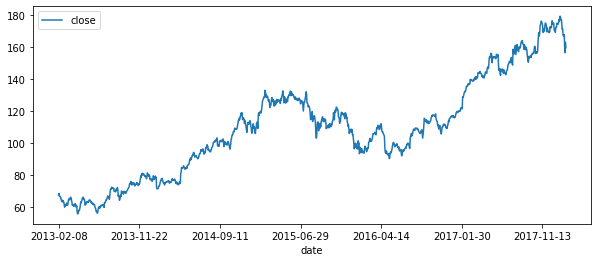

In [ ]:
import matplotlib.pyplot as plt

aapl.plot(x='date', y='close',legend=True,figsize=(10,4))
plt.ioff()

In [ ]:
df.date[:10]

1259    2013-02-08
1260    2013-02-11
1261    2013-02-12
1262    2013-02-13
1263    2013-02-14
1264    2013-02-15
1265    2013-02-19
1266    2013-02-20
1267    2013-02-21
1268    2013-02-22
Name: date, dtype: object

In [ ]:
#select the columns date and close price
df = df[['date','close']]
df

date     close
1259  2013-02-08   67.8542
1260  2013-02-11   68.5614
1261  2013-02-12   66.8428
1262  2013-02-13   66.7156
1263  2013-02-14   66.6556
...          ...       ...
2513  2018-02-01  167.7800
2514  2018-02-02  160.5000
2515  2018-02-05  156.4900
2516  2018-02-06  163.0300
2517  2018-02-07  159.5400

[1259 rows x 2 columns]

In [ ]:

X = [] ## input
y = [] ## ouput
for i  in range(df.shape[0]-7-1):   
  X.append(df['close'].iloc[i:i+7])# 0 -->[0:7], 1-->[1:8]
  y.append(df['close'].iloc[i+7])# 7,8,9
print(X[:2])

[1259    67.8542
1260    68.5614
1261    66.8428
1262    66.7156
1263    66.6556
1264    65.7371
1265    65.7128
Name: close, dtype: float64, 1260    68.5614
1261    66.8428
1262    66.7156
1263    66.6556
1264    65.7371
1265    65.7128
1266    64.1214
Name: close, dtype: float64]


In [ ]:
import numpy as np
X = np.array(X)

In [ ]:
df1  = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

d1       d2       d3       d4       d5       d6       d7
0  67.8542  68.5614  66.8428  66.7156  66.6556  65.7371  65.7128
1  68.5614  66.8428  66.7156  66.6556  65.7371  65.7128  64.1214
2  66.8428  66.7156  66.6556  65.7371  65.7128  64.1214  63.7228
3  66.7156  66.6556  65.7371  65.7128  64.1214  63.7228  64.4014
4  66.6556  65.7371  65.7128  64.1214  63.7228  64.4014  63.2571

In [ ]:
df1['d8'] = y
df1.head()

d1       d2       d3       d4       d5       d6       d7       d8
0  67.8542  68.5614  66.8428  66.7156  66.6556  65.7371  65.7128  64.1214
1  68.5614  66.8428  66.7156  66.6556  65.7371  65.7128  64.1214  63.7228
2  66.8428  66.7156  66.6556  65.7371  65.7128  64.1214  63.7228  64.4014
3  66.7156  66.6556  65.7371  65.7128  64.1214  63.7228  64.4014  63.2571
4  66.6556  65.7371  65.7128  64.1214  63.7228  64.4014  63.2571  64.1385

In [ ]:
df1.shape

(1251, 8)

In [ ]:
#Train test split
X_train = df1.iloc[0:1000,0:7]
X_test = df1.iloc[1000:,0:7]
y_train =  df1['d8'][:1000]
y_test  = df1['d8'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(251, 7)
(251,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

d1            d2  ...            d6            d7
count  1.000000e+03  1.000000e+03  ...  1.000000e+03  1.000000e+03
mean  -2.144951e-16  2.180478e-16  ... -4.685141e-16  5.415668e-16
std    1.000500e+00  1.000500e+00  ...  1.000500e+00  1.000500e+00
min   -1.958686e+00 -1.961817e+00  ... -1.973369e+00 -1.976285e+00
25%   -9.754621e-01 -9.759034e-01  ... -9.817153e-01 -9.833843e-01
50%    1.544104e-01  1.547511e-01  ...  1.522188e-01  1.503369e-01
75%    7.908680e-01  7.896254e-01  ...  7.843342e-01  7.840049e-01
max    1.692881e+00  1.690844e+00  ...  1.679752e+00  1.676581e+00

[8 rows x 7 columns]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
# 256 cels
model.add(LSTM(256,input_shape=(7,1)))
# single neuron
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
X_test.shape

(251, 7)

In [ ]:
 # number of records , time steps,Features
X_train_sc = X_train_sc.values.reshape(1000,7,1)
X_test_sc = X_test_sc.values.reshape(251,7,1)

In [ ]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 8851.6890 - val_loss: 17657.0300
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 5534.0014 - val_loss: 15066.3418
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 4026.3405 - val_loss: 12976.9748
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 3105.1402 - val_loss: 11290.2542
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 2409.2926 - val_loss: 9906.7059
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1883.1332 - val_loss: 8746.3489
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1482.5574 - val_loss: 7780.1934
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1182.8231 - val_loss: 6982.7670
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 

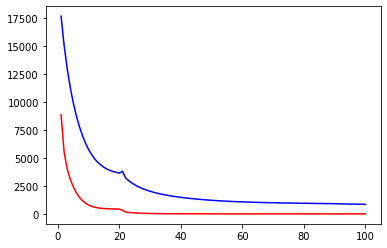

In [ ]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [ ]:
model.predict(X_test_sc)

array([[127.19086 ],
       [127.41882 ],
       [127.70985 ],
       [127.80571 ],
       [127.896324],
       [127.98798 ],
       [128.06561 ],
       [128.13629 ],
       [128.20729 ],
       [128.25548 ],
       [128.30801 ],
       [128.35347 ],
       [128.38162 ],
       [128.39558 ],
       [128.40701 ],
       [128.44728 ],
       [128.4677  ],
       [128.49069 ],
       [128.52376 ],
       [128.5466  ],
       [128.55798 ],
       [128.5879  ],
       [128.57741 ],
       [128.58235 ],
       [128.5721  ],
       [128.5843  ],
       [128.5882  ],
       [128.59163 ],
       [128.61911 ],
       [128.62296 ],
       [128.63484 ],
       [128.65541 ],
       [128.65654 ],
       [128.65492 ],
       [128.68889 ],
       [128.68724 ],
       [128.71936 ],
       [128.73558 ],
       [128.74963 ],
       [128.76768 ],
       [128.79384 ],
       [128.79543 ],
       [128.79332 ],
       [128.78804 ],
       [128.77547 ],
       [128.77432 ],
       [128.75175 ],
       [128.7

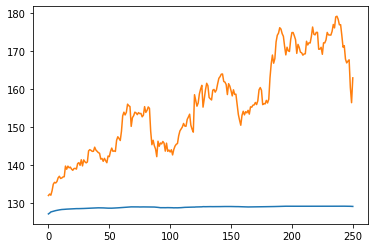

In [ ]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)


In [ ]:
X_test_sc[0].reshape(1,7,1)

array([[[1.15514925],
        [1.13970507],
        [1.48769694],
        [1.47426404],
        [1.49731882],
        [1.5515313 ],
        [1.60703417]]])

In [ ]:
model.predict(X_test_sc[0].reshape(1,7,1))

array([[127.19086]], dtype=float32)

In [ ]:
y_test[1000]

132.04

In [ ]:
data.shape

(619040, 7)

In [ ]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:

data.Ticks.nunique()

505

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 256 cels
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam',loss='mse')

In [ ]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 8953.0660 - val_loss: 17569.0782
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 5388.7948 - val_loss: 14937.6011
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 3966.8202 - val_loss: 12850.8248
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 3062.4020 - val_loss: 11193.8744
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 2379.8699 - val_loss: 9833.1298
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1860.0990 - val_loss: 8697.7092
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1474.3790 - val_loss: 7733.1228
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1181.5279 - val_loss: 6931.0705
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 

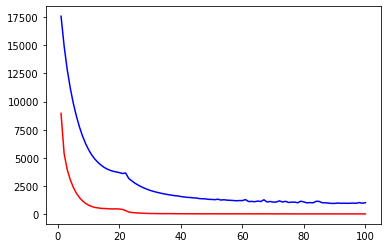

In [ ]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')